In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
df=pd.read_csv('salary_lasso.csv')
df

,experience,education_level,certifications,skills_score,projects_handled,leadership_score,communication_score,location_index,department_index,salary_k
0,1,18,5,1.1,27,8.5,2.7,3,2,55.8
1,2,16,2,5.3,5,4.3,2.4,3,6,58.2
2,20,16,3,0.9,8,0.1,2.3,5,1,114.5
3,14,16,1,2.2,20,2.7,9.1,1,3,71.6
4,6,18,4,6.2,22,5.9,8.0,1,6,56.1
...,...,...,...,...,...,...,...,...,...,...
145,14,12,3,4.8,29,8.0,9.2,5,3,105.7
146,16,12,0,1.2,2,4.9,6.0,3,3,86.8
147,6,18,3,5.3,20,8.6,7.6,5,7,89.4
148,10,12,4,0.9,15,6.5,9.5,1,5,68.0


In [111]:
columns=df.columns.tolist()
print(columns)

['experience', 'education_level', 'certifications', 'skills_score', 'projects_handled', 'leadership_score', 'communication_score', 'location_index', 'department_index', 'salary_k']


In [112]:
df.isnull().sum()


experience             0
education_level        0
certifications         0
skills_score           0
projects_handled       0
leadership_score       0
communication_score    0
location_index         0
department_index       0
salary_k               0
dtype: int64

In [113]:
df.duplicated().sum()

np.int64(0)

In [114]:
df.describe()

,experience,education_level,certifications,skills_score,projects_handled,leadership_score,communication_score,location_index,department_index,salary_k
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,9.813333,14.786667,3.093333,4.908667,14.586667,4.894000,5.075333,3.233333,4.206667,77.186000
std,6.279173,1.923317,2.190114,2.936668,8.383578,2.899994,2.885510,1.490087,2.057224,22.387775
min,0.000000,12.000000,0.000000,0.100000,0.000000,0.000000,0.000000,1.000000,1.000000,29.300000
25%,4.000000,14.000000,1.000000,2.325000,8.000000,2.400000,2.500000,2.000000,2.000000,59.525000
50%,10.000000,14.000000,3.000000,5.000000,14.000000,4.500000,4.850000,4.000000,4.000000,77.100000
75%,16.000000,16.000000,5.000000,7.325000,21.000000,7.375000,7.700000,5.000000,6.000000,94.100000
max,20.000000,18.000000,7.000000,10.000000,29.000000,10.000000,9.800000,5.000000,7.000000,125.500000


In [115]:
nums_col=df.select_dtypes(include=[np.number]).columns
df[nums_col].skew()

experience             0.046456
education_level        0.009759
certifications         0.155248
skills_score           0.012115
projects_handled       0.018821
leadership_score       0.105016
communication_score   -0.053619
location_index        -0.297059
department_index      -0.127574
salary_k               0.128658
dtype: float64

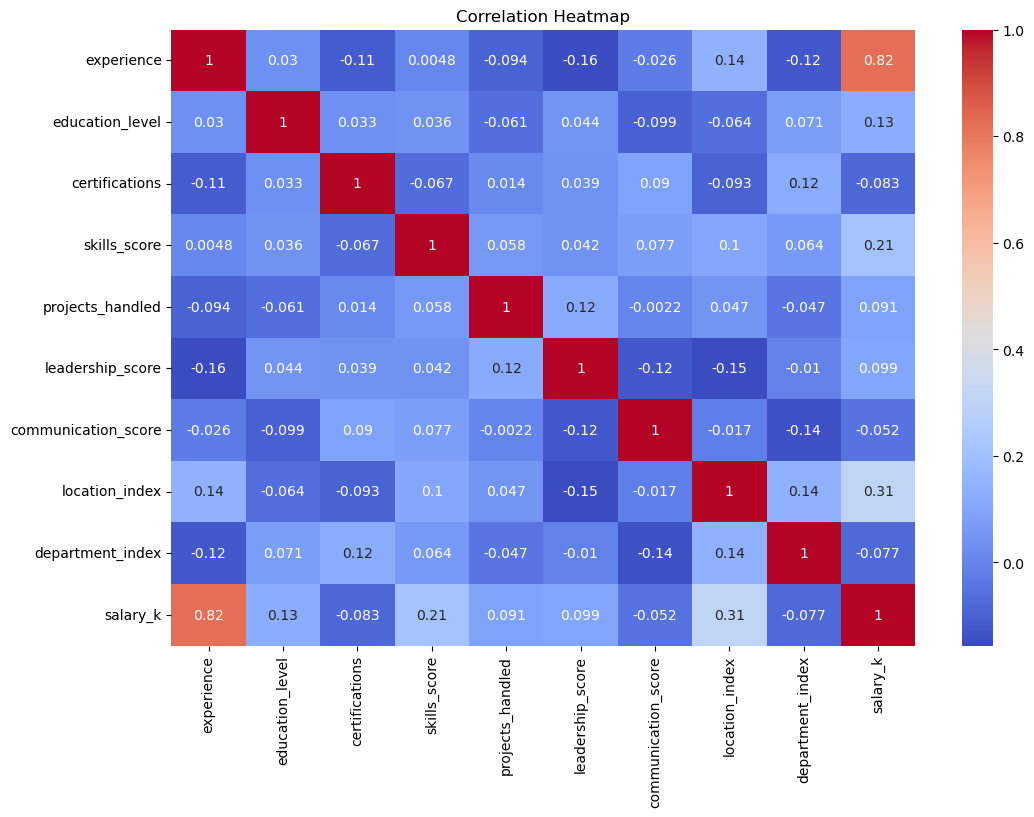

In [116]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

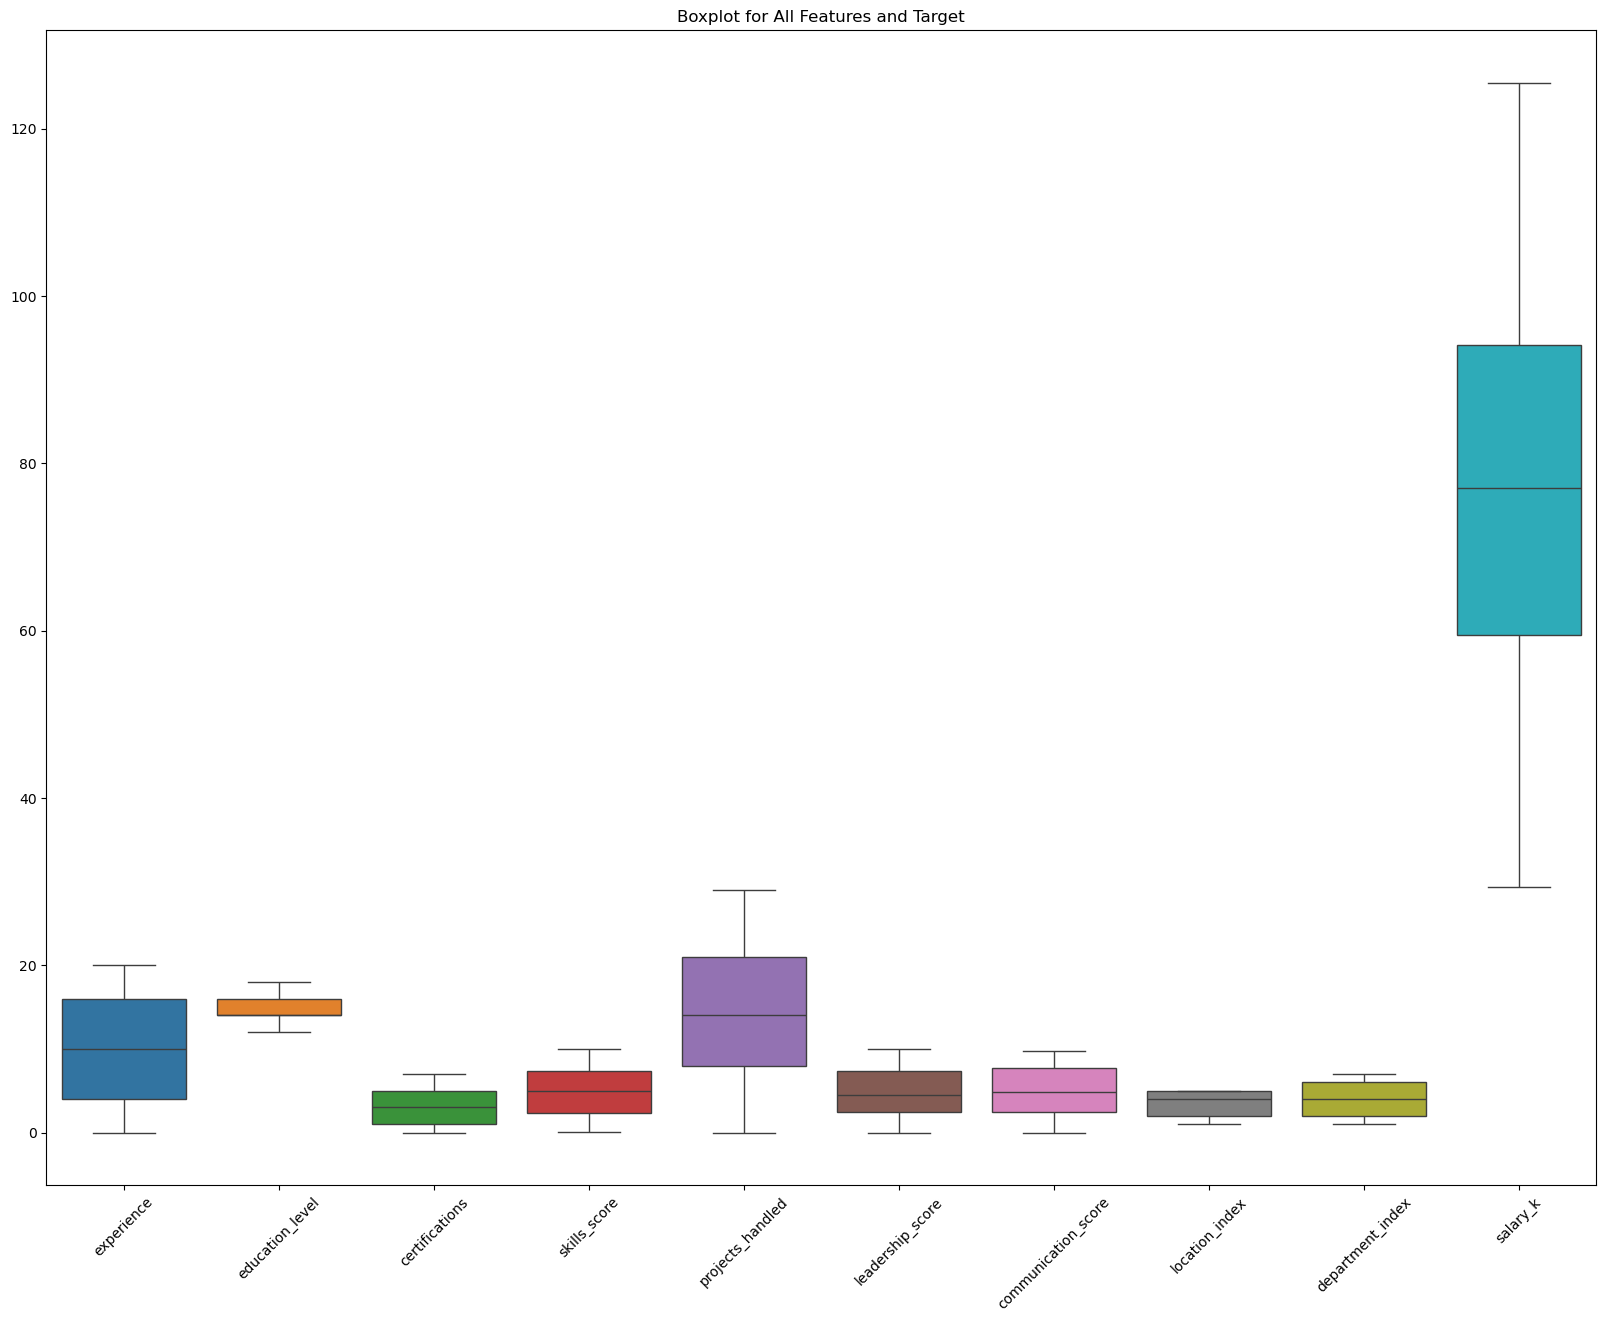

In [117]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df)
plt.title("Boxplot for All Features and Target")
plt.xticks(rotation=45)
plt.show()


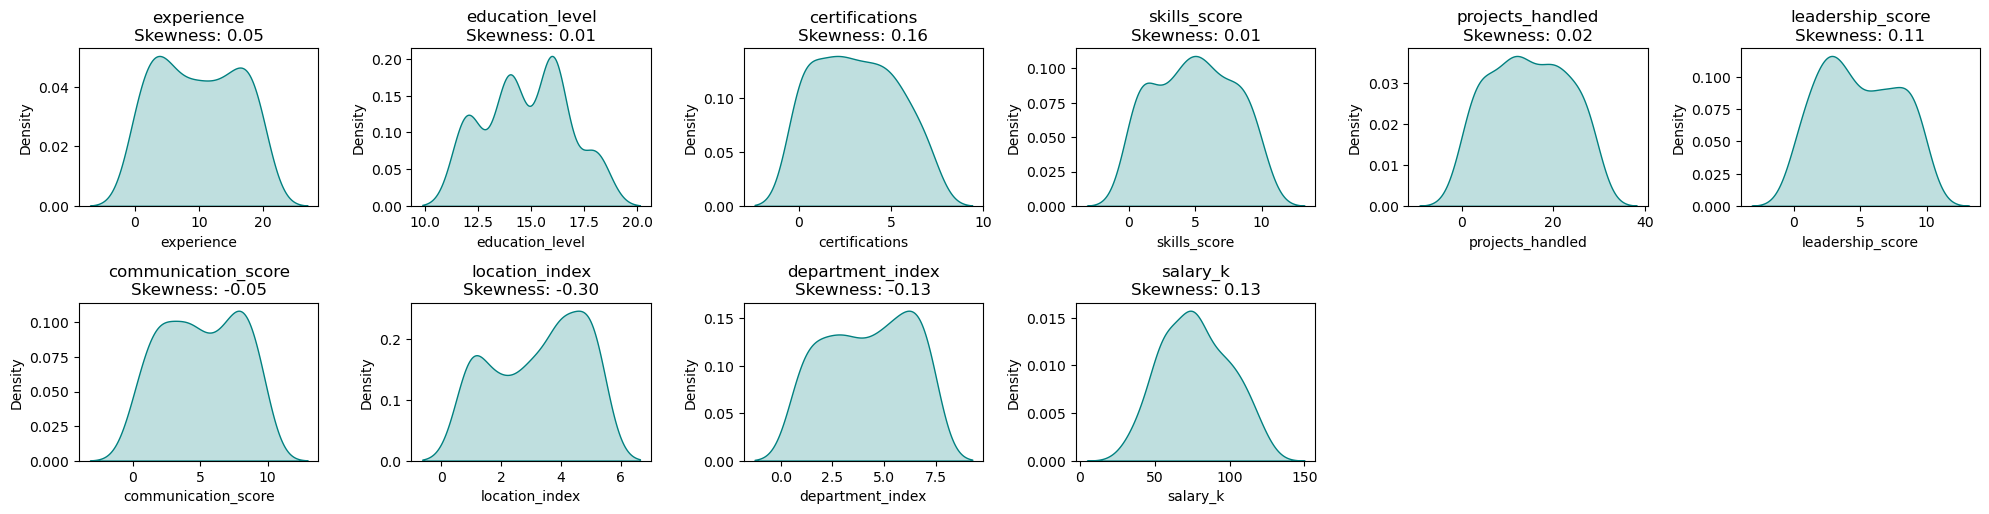

In [118]:
plt.figure(figsize=(20,15))
plotnumber = 1

for col in nums_col: 
    ax = plt.subplot(6,6,plotnumber)
    sns.kdeplot(df[col], fill=True, color='teal')  
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'{col}\nSkewness: {df[col].skew():.2f}')
    plotnumber += 1

plt.tight_layout()
plt.show()

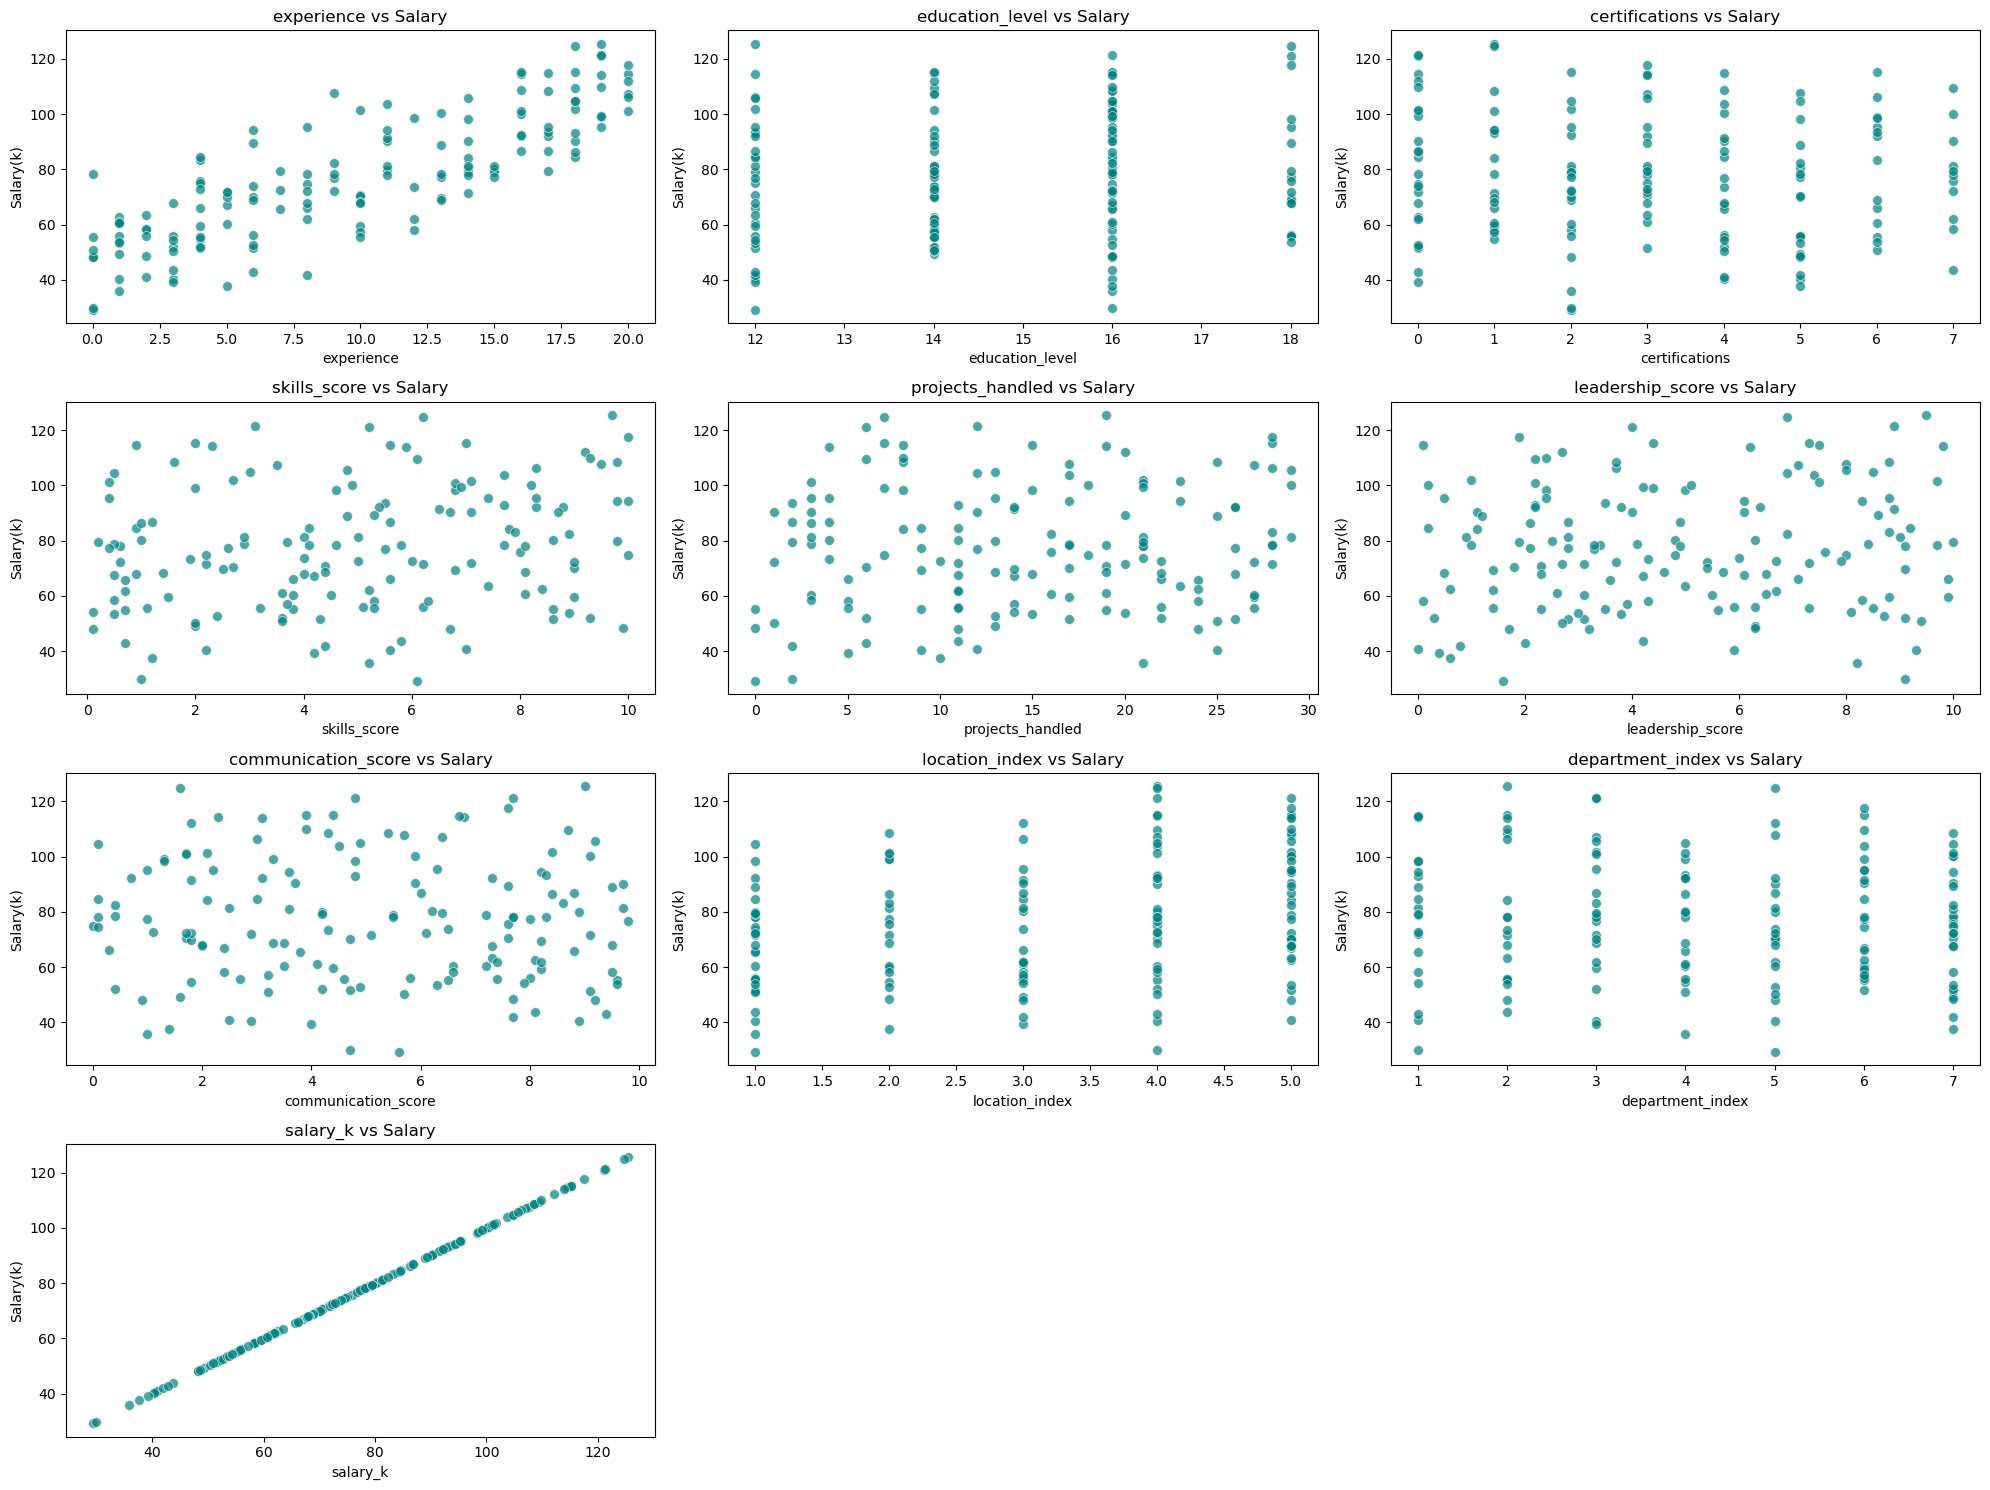

In [119]:
plt.figure(figsize=(20,15))
plot=1
for col in nums_col:
    ax=plt.subplot(4,3,plot)
    sns.scatterplot(x=df[col],y=df['salary_k'],color='teal',s=50,alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Salary(k)')
    plt.title(f'{col} vs Salary')
    plot+=1
plt.tight_layout()
plt.show()

In [120]:
X=df.drop('salary_k',axis=1)
X

,experience,education_level,certifications,skills_score,projects_handled,leadership_score,communication_score,location_index,department_index
0,1,18,5,1.1,27,8.5,2.7,3,2
1,2,16,2,5.3,5,4.3,2.4,3,6
2,20,16,3,0.9,8,0.1,2.3,5,1
3,14,16,1,2.2,20,2.7,9.1,1,3
4,6,18,4,6.2,22,5.9,8.0,1,6
...,...,...,...,...,...,...,...,...,...
145,14,12,3,4.8,29,8.0,9.2,5,3
146,16,12,0,1.2,2,4.9,6.0,3,3
147,6,18,3,5.3,20,8.6,7.6,5,7
148,10,12,4,0.9,15,6.5,9.5,1,5


In [121]:
y=df['salary_k']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [124]:
y_pred = lasso.predict(X_test)

In [125]:
r2 = r2_score(y_test, y_pred)
rm = np.sqrt(mean_squared_error(y_test, y_pred))

In [126]:
print("Alpha (λ):", lasso.alpha_)
print("Intercept:", lasso.intercept_)
print("Coefficients:\n", pd.Series(lasso.coef_, index=X.columns))
print("R2:", r2)
print("root mean squared error :", rm)

Alpha (λ): 0.9092690430501623
Intercept: 8.733563722180904
Coefficients:
 experience             2.941912
education_level        0.896169
certifications         0.014456
skills_score           0.992691
projects_handled       0.283318
leadership_score       1.805606
communication_score   -0.180128
location_index         2.763988
department_index      -0.000000
dtype: float64
R2: 0.8568514803290076
root mean squared error : 8.637851343232036


In [127]:
selected_features=X.columns[lasso.coef_!=0]
print("non-zero coefficients:",selected_features)

non-zero coefficients: Index(['experience', 'education_level', 'certifications', 'skills_score',
       'projects_handled', 'leadership_score', 'communication_score',
       'location_index'],
      dtype='object')


In [128]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
r2_lr=r2_score(y_test,y_pred_lr)
rm_lr=np.sqrt(mean_squared_error(y_test,y_pred_lr))


In [129]:
print("R2 for linear:", r2_lr)
print("root mean squared error for linear:", rm_lr)

R2 for linear: 0.855890099247935
root mean squared error for linear: 8.666808578364744


In [130]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

lasso_selected = LinearRegression()
lasso_selected.fit(X_train_sel, y_train)
y_pred_sel = lasso_selected.predict(X_test_sel)

In [131]:
r2_sel = r2_score(y_test, y_pred_sel)
rm_sel = np.sqrt(mean_squared_error(y_test, y_pred_sel))

In [132]:
print("R2 for selected:", r2_sel)
print("root mean squared error for selected:", rm_sel)

R2 for selected: 0.8572160549094487
root mean squared error for selected: 8.626844772316417


In [134]:
import joblib
joblib.dump(lr, 'linear_model.pkl')

['linear_model.pkl']